# Модуль A

In [1]:
help('modules')


Please wait a moment while I gather a list of all available modules...



c:\Users\Руслан\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Руслан\AppData\Local\Programs\Python\Python310\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn(
c:\Users\Руслан\AppData\Local\Programs\Python\Python310\lib\pkgutil.py:92: UserWarning: The numpy.array_api submodule is still experimental. See NEP 47.
  __import__(info.name)
c:\Users\Руслан\AppData\Local\Programs\Python\Python310\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
c:\Users\Руслан\AppData\Local\Programs\Python\Python310\lib\site-packages\pydantic\experimen

IPython             concurrent          msvcrt              stack_data
PIL                 configparser        multipart           starlette
SPARQLWrapper       contextlib          multiprocessing     start_pythonwin
__future__          contextvars         narwhals            stat
_abc                contourpy           nbclient            statistics
_aix_support        copy                nbconvert           streamlit
_argon2_cffi_bindings copyreg             nbformat            string
_ast                crypt               nest_asyncio        stringprep
_asyncio            csv                 netbios             struct
_bisect             ctypes              netrc               subprocess
_blake2             curses              networkx            sunau
_bootsubprocess     cv2                 nlpaug              sympy
_bz2                cycler              nltk                symtable
_cffi_backend       dataclasses         nntplib             sys
_codecs             datetime      

## Импорт библиотек

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import re
from sklearn.preprocessing import MultiLabelBinarizer
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from pymorphy3 import MorphAnalyzer
import nltk
nltk.download("stopwords")
nltk.download('punkt_tab')
from scipy.sparse import hstack
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, Input, Concatenate
from tensorflow.keras.models import Sequential, Model
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import shap
from sklearn.inspection import permutation_importance
from tensorflow.keras.optimizers import Adam
from gensim.models import Word2Vec
from nltk.corpus import wordnet
import random
from tqdm import tqdm
tqdm.pandas()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Руслан\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Руслан\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
c:\Users\Руслан\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Загрузка данных

In [2]:
filepath = "Выгрузка 9 апреля.xls"
encoding = "windows-1251"

In [3]:
with open(filepath, 'r', encoding=encoding) as f:
    # Парсер HTML-страниц
    soup = BeautifulSoup(f, 'html.parser')
    # Получаем нужную таблицу из файла
    tables = soup.find_all('table')[1]

    dataset = pd.read_html(str(tables))[0]

C:\Users\Руслан\AppData\Local\Temp\ipykernel_21040\595549392.py:7: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dataset = pd.read_html(str(tables))[0]


In [8]:
dataset

,№ п/п,№ документа,Дата регистрации,Исх. № Дата,Адресат,Автор,Краткое содержание,Примечание
0,1,WSR/1-838/2019,09.04.2019,208-409 08.04.2019,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...,NaN
1,2,WSR/1-837/2019,09.04.2019,05-338 09.04.2019,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...,NaN
2,3,WSR/1-835/2019,09.04.2019,И10-14/3137 09.04.2019,Уразов Р.Н.,Цивилев С.Е. (Администрация Кемеровской области),Вх - О командировании Саликовой К. и Глушко Д....,NaN
3,4,WSR/1-834/2019,09.04.2019,Д2/7121-ИС 03.04.2019,Иванюк Л.А.,Волков Г.А. (Министерство транспорта Российско...,Вх - Об участии в Чемпионате мира по профессио...,NaN
4,5,WSR/1-833/2019,09.04.2019,15-20/06-911 08.04.2019,Уразов Р.Н.,Атанов И.В. (Ставропольский государственный аг...,Вх - Об участии в церемонии открытия Вузовског...,NaN
...,...,...,...,...,...,...,...,...
4962,4963,WSR/1.-1749/2017,01.11.2017,11 20.10.2017,Уразов Р.Н.,Медведев Д.А. (Аппарат Правительства Российско...,Протокол заседания Президиума Совета при Прези...,NaN
4963,4964,WSR/1.-1751/2017,01.11.2017,ТС-1164/06 31.10.2017,Уразов Р.Н.,Синюгина Т.Ю. (Министерство образования и наук...,О проведении 21.11.2017 заседания организацион...,NaN
4964,4965,WSR/1.-1748/2017,01.11.2017,ЛО-95/06пр,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,Протокол заседания рабочей группы приоритетног...,NaN
4965,4966,WSR/1.-1747/2017,01.11.2017,ЛО-93/06пр 24.10.2017,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,Протокол заседания рабочей группы приоритетног...,NaN


In [5]:
dataset["Адресат"].unique()

array(['Уразов Р.Н.', 'Иванюк Л.А.', 'Миронова С.В.', 'Тымчиков А.Ю.',
       'Крайчинская С.Б.', 'Антонов Ю.В.', 'Глушко Д.Е.', 'Аштаева К.Д.',
       'Митькина А.Н.', 'Желковский И.И.', 'Митяева И.В.',
       'Мухаметзянов Д.Ф.', 'Недоспасова О.В. Никул Е.В.',
       'Саликова К.В.', 'Куколев С.В.',
       'Носков К.Ю. Попова А.Ю. Кочнев Д.В. Алешин А.В. Колобков П.А. Колокольцев В.А. Золотов В.В. Булавин В.И. Бортников А.В. Чайка Ю.Я. Скворцова В.И. Зиничев Е.Н. Шойгу С.К. Васильева О.Ю. Дитрих Е.И. Кобылкин Д.Н. Уразов Р.Н. Нарышкин С.Е. Нерадько А.В. Чиханчин Ю.А. Кудрин А.Л. Лавров С.В Бастрыкин А.И. Коновалов А.В.',
       'Гонтарь М.А.', 'Недоспасова О.В.', 'Глушко Д.Е. Тымчиков А.Ю.',
       'Глушко Д.Е. Иванюк Л.А.', 'Митькина А.Н. Миронова С.В.',
       'Серафимова О.В.', 'Селукова А.И.', 'Зайчикова И.А.',
       'Зензинова К.В.', 'Кожевникова Е.И.', 'Базер О.Э.',
       'Митяева И.В. Крайчинская С.Б.', 'Досканова А.В.',
       'Вишнякова О.Б.', 'Никул Е.В.', 'Алимов А.А.', 

## Выбор значимых атрибутов

In [4]:
dataset.drop(columns=["№ п/п", "№ документа"], inplace=True)

<b>Вывод</b>

Сразу удаляем колонки <i>№ п/п</i> и <i>№ документа</i>, так как судя по Алгоритму документооборота вряд ли номера документов смогут помочь модели предсказывать Адресатов.

## Разбиение колонки "Исх. № Дата"

In [5]:
def get_date(row):
    try:
        date = row.split(" ")[-1]
        return date
    except:
        return None

In [6]:
dataset["Исх. Дата"] = dataset["Исх. № Дата"].progress_apply(get_date)

dataset["Исх. Дата"] = pd.to_datetime(dataset["Исх. Дата"], format="%d.%m.%Y", errors='coerce')

100%|██████████| 4967/4967 [00:00<?, ?it/s]


In [9]:
dataset

,Дата регистрации,Исх. № Дата,Адресат,Автор,Краткое содержание,Примечание,Исх. Дата
0,09.04.2019,208-409 08.04.2019,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...,NaN,2019-04-08
1,09.04.2019,05-338 09.04.2019,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...,NaN,2019-04-09
2,09.04.2019,И10-14/3137 09.04.2019,Уразов Р.Н.,Цивилев С.Е. (Администрация Кемеровской области),Вх - О командировании Саликовой К. и Глушко Д....,NaN,2019-04-09
3,09.04.2019,Д2/7121-ИС 03.04.2019,Иванюк Л.А.,Волков Г.А. (Министерство транспорта Российско...,Вх - Об участии в Чемпионате мира по профессио...,NaN,2019-04-03
4,09.04.2019,15-20/06-911 08.04.2019,Уразов Р.Н.,Атанов И.В. (Ставропольский государственный аг...,Вх - Об участии в церемонии открытия Вузовског...,NaN,2019-04-08
...,...,...,...,...,...,...,...
4962,01.11.2017,11 20.10.2017,Уразов Р.Н.,Медведев Д.А. (Аппарат Правительства Российско...,Протокол заседания Президиума Совета при Прези...,NaN,2017-10-20
4963,01.11.2017,ТС-1164/06 31.10.2017,Уразов Р.Н.,Синюгина Т.Ю. (Министерство образования и наук...,О проведении 21.11.2017 заседания организацион...,NaN,2017-10-31
4964,01.11.2017,ЛО-95/06пр,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,Протокол заседания рабочей группы приоритетног...,NaN,NaT
4965,01.11.2017,ЛО-93/06пр 24.10.2017,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,Протокол заседания рабочей группы приоритетног...,NaN,2017-10-24


In [7]:
dataset.drop(columns=["Исх. № Дата"], inplace=True)

<b>Вывод</b>

Была извлечена дата из колонки <i>Исх. № Дата</i>. Исходный номер вряд ли поможет в предсказании нужного адресата, так что удалим эту колонку.

## Исключение фактора "Кадровые перестановки"

<i>То есть нужно избавиться от ФИО в колонках Автор и Адресат</i>

In [8]:
def get_organization(row):
    result = re.search(r"\(.+\)", row)

    return result.group(0).replace("(", "").replace(")", "")

In [57]:
# Пример работы функции
get_organization("Антонова С.В. (АО «Интерфакс»)")

'АО «Интерфакс»'

In [9]:
dataset["Автор"] = dataset["Автор"].apply(get_organization)

In [14]:
dataset

,Дата регистрации,Адресат,Автор,Краткое содержание,Примечание,Исх. Дата
0,09.04.2019,Уразов Р.Н.,АО «Интерфакс»,Вх - О возможности использования сетевого изда...,NaN,2019-04-08
1,09.04.2019,Уразов Р.Н.,Министерство просвещения Российской Федерации,Вх - Об участии в совещании по вопросу доработ...,NaN,2019-04-09
2,09.04.2019,Уразов Р.Н.,Администрация Кемеровской области,Вх - О командировании Саликовой К. и Глушко Д....,NaN,2019-04-09
3,09.04.2019,Иванюк Л.А.,Министерство транспорта Российской Федерации,Вх - Об участии в Чемпионате мира по профессио...,NaN,2019-04-03
4,09.04.2019,Уразов Р.Н.,Ставропольский государственный аграрный универ...,Вх - Об участии в церемонии открытия Вузовског...,NaN,2019-04-08
...,...,...,...,...,...,...
4962,01.11.2017,Уразов Р.Н.,Аппарат Правительства Российской Федерации,Протокол заседания Президиума Совета при Прези...,NaN,2017-10-20
4963,01.11.2017,Уразов Р.Н.,Министерство образования и науки РФ. Заместите...,О проведении 21.11.2017 заседания организацион...,NaN,2017-10-31
4964,01.11.2017,Уразов Р.Н.,Министерство образования и науки Российской Фе...,Протокол заседания рабочей группы приоритетног...,NaN,NaT
4965,01.11.2017,Уразов Р.Н.,Министерство образования и науки Российской Фе...,Протокол заседания рабочей группы приоритетног...,NaN,2017-10-24


In [59]:
dataset["Адресат"].unique()

array(['Уразов Р.Н.', 'Иванюк Л.А.', 'Миронова С.В.', 'Тымчиков А.Ю.',
       'Крайчинская С.Б.', 'Антонов Ю.В.', 'Глушко Д.Е.', 'Аштаева К.Д.',
       'Митькина А.Н.', 'Желковский И.И.', 'Митяева И.В.',
       'Мухаметзянов Д.Ф.', 'Недоспасова О.В. Никул Е.В.',
       'Саликова К.В.', 'Куколев С.В.',
       'Носков К.Ю. Попова А.Ю. Кочнев Д.В. Алешин А.В. Колобков П.А. Колокольцев В.А. Золотов В.В. Булавин В.И. Бортников А.В. Чайка Ю.Я. Скворцова В.И. Зиничев Е.Н. Шойгу С.К. Васильева О.Ю. Дитрих Е.И. Кобылкин Д.Н. Уразов Р.Н. Нарышкин С.Е. Нерадько А.В. Чиханчин Ю.А. Кудрин А.Л. Лавров С.В Бастрыкин А.И. Коновалов А.В.',
       'Гонтарь М.А.', 'Недоспасова О.В.', 'Глушко Д.Е. Тымчиков А.Ю.',
       'Глушко Д.Е. Иванюк Л.А.', 'Митькина А.Н. Миронова С.В.',
       'Серафимова О.В.', 'Селукова А.И.', 'Зайчикова И.А.',
       'Зензинова К.В.', 'Кожевникова Е.И.', 'Базер О.Э.',
       'Митяева И.В. Крайчинская С.Б.', 'Досканова А.В.',
       'Вишнякова О.Б.', 'Никул Е.В.', 'Алимов А.А.', 

In [10]:
# Переведём Адресаты в One-Hot формат

def get_names(row):
    result = row.split(". ")
    result = [el.replace(".", " ").strip() for el in result]

    return result

In [13]:
get_names('Глушко Д.Е. Митькина А.Н.')

['Глушко Д Е', 'Митькина А Н']

In [11]:
dataset["Адресат"] = dataset["Адресат"].progress_apply(get_names)

100%|██████████| 4967/4967 [00:00<?, ?it/s]


In [19]:
dataset

,Дата регистрации,Адресат,Автор,Краткое содержание,Примечание,Исх. Дата
0,09.04.2019,[Уразов Р Н],АО «Интерфакс»,Вх - О возможности использования сетевого изда...,NaN,2019-04-08
1,09.04.2019,[Уразов Р Н],Министерство просвещения Российской Федерации,Вх - Об участии в совещании по вопросу доработ...,NaN,2019-04-09
2,09.04.2019,[Уразов Р Н],Администрация Кемеровской области,Вх - О командировании Саликовой К. и Глушко Д....,NaN,2019-04-09
3,09.04.2019,[Иванюк Л А],Министерство транспорта Российской Федерации,Вх - Об участии в Чемпионате мира по профессио...,NaN,2019-04-03
4,09.04.2019,[Уразов Р Н],Ставропольский государственный аграрный универ...,Вх - Об участии в церемонии открытия Вузовског...,NaN,2019-04-08
...,...,...,...,...,...,...
4962,01.11.2017,[Уразов Р Н],Аппарат Правительства Российской Федерации,Протокол заседания Президиума Совета при Прези...,NaN,2017-10-20
4963,01.11.2017,[Уразов Р Н],Министерство образования и науки РФ. Заместите...,О проведении 21.11.2017 заседания организацион...,NaN,2017-10-31
4964,01.11.2017,[Уразов Р Н],Министерство образования и науки Российской Фе...,Протокол заседания рабочей группы приоритетног...,NaN,NaT
4965,01.11.2017,[Уразов Р Н],Министерство образования и науки Российской Фе...,Протокол заседания рабочей группы приоритетног...,NaN,2017-10-24


In [12]:
# Переведём Адресаты в One-Hot формат

mlb = MultiLabelBinarizer(sparse_output=True)

dataset = dataset.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(dataset.pop("Адресат")),
                index=dataset.index,
                columns=mlb.classes_))

In [21]:
dataset["Краткое содержание"][0]

'Вх - О возможности использования сетевого издания "Информационный ресурс СПАРК" в работе Союза'

In [22]:
dataset

,Дата регистрации,Автор,Краткое содержание,Примечание,Исх. Дата,Абдулгалеев З Т,Абдулганиев Ф С,Абдуллазянов Э Ю,Абдуллин А М,Аблязов К А,...,Шайхутдинов Х Х,Шакиров Р А,Шафигуллин Л Н,Шаяхметов Р К,Шигабутдинов А К,Шойгу С К,Щугорев Н А,Юсупов И У,Юшко С В,Якубов Ю Д
0,09.04.2019,АО «Интерфакс»,Вх - О возможности использования сетевого изда...,NaN,2019-04-08,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,09.04.2019,Министерство просвещения Российской Федерации,Вх - Об участии в совещании по вопросу доработ...,NaN,2019-04-09,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,09.04.2019,Администрация Кемеровской области,Вх - О командировании Саликовой К. и Глушко Д....,NaN,2019-04-09,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,09.04.2019,Министерство транспорта Российской Федерации,Вх - Об участии в Чемпионате мира по профессио...,NaN,2019-04-03,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,09.04.2019,Ставропольский государственный аграрный универ...,Вх - Об участии в церемонии открытия Вузовског...,NaN,2019-04-08,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4962,01.11.2017,Аппарат Правительства Российской Федерации,Протокол заседания Президиума Совета при Прези...,NaN,2017-10-20,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4963,01.11.2017,Министерство образования и науки РФ. Заместите...,О проведении 21.11.2017 заседания организацион...,NaN,2017-10-31,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4964,01.11.2017,Министерство образования и науки Российской Фе...,Протокол заседания рабочей группы приоритетног...,NaN,NaT,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4965,01.11.2017,Министерство образования и науки Российской Фе...,Протокол заседания рабочей группы приоритетног...,NaN,2017-10-24,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Векторизация текстов

In [13]:
dataset[["Краткое содержание", "Примечание"]] = dataset[["Краткое содержание", "Примечание"]].fillna("")

In [14]:
ru_stopwords = stopwords.words("russian")
morph = MorphAnalyzer()

In [15]:
# Токенизация текста

def preprocess_text(text):
    if text is None:
        return ""
    text = str(text).lower()
    text = re.sub(r"[{}]".format(string.punctuation), "", text)
    text = word_tokenize(text, language="russian")
    text = [word for word in text if word not in ru_stopwords]
    text = [morph.parse(word)[0].normal_form for word in text]

    return " ".join(text)

In [26]:
preprocess_text('Вх - О возможности использования сетевого издания "Информационный ресурс СПАРК" в работе Союза')

'вх возможность использование сетевой издание информационный ресурс спарк работа союз'

In [16]:
dataset["Краткое содержание"] = dataset["Краткое содержание"].progress_apply(preprocess_text)

100%|██████████| 4967/4967 [00:03<00:00, 1316.14it/s]


In [17]:
dataset["Примечание"] = dataset["Примечание"].progress_apply(preprocess_text)

100%|██████████| 4967/4967 [00:00<00:00, 30714.98it/s]


In [18]:
dataset["Автор"] = dataset["Автор"].progress_apply(preprocess_text)

100%|██████████| 4967/4967 [00:02<00:00, 1709.88it/s]


In [30]:
dataset

,Дата регистрации,Автор,Краткое содержание,Примечание,Исх. Дата,Абдулгалеев З Т,Абдулганиев Ф С,Абдуллазянов Э Ю,Абдуллин А М,Аблязов К А,...,Шайхутдинов Х Х,Шакиров Р А,Шафигуллин Л Н,Шаяхметов Р К,Шигабутдинов А К,Шойгу С К,Щугорев Н А,Юсупов И У,Юшко С В,Якубов Ю Д
0,09.04.2019,ао « интерфакс »,вх возможность использование сетевой издание и...,,2019-04-08,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,09.04.2019,министерство просвещение российский федерация,вх участие совещание вопрос доработка фэо пред...,,2019-04-09,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,09.04.2019,администрация кемеровский область,вх командирование саликов глушко далее участие...,,2019-04-09,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,09.04.2019,министерство транспорт российский федерация,вх участие чемпионат мир профессиональный маст...,,2019-04-03,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,09.04.2019,ставропольский государственный аграрный универ...,вх участие церемония открытие вузовский чемпио...,,2019-04-08,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4962,01.11.2017,аппарат правительство российский федерация,протокол заседание президиум совет президент р...,,2017-10-20,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4963,01.11.2017,министерство образование наука рф заместитель ...,проведение 21112017 заседание организационный ...,,2017-10-31,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4964,01.11.2017,министерство образование наука российский феде...,протокол заседание рабочий группа приоритетный...,,NaT,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4965,01.11.2017,министерство образование наука российский феде...,протокол заседание рабочий группа приоритетный...,,2017-10-24,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
vectorizer_1 = TfidfVectorizer(max_features=800)
text_bow = vectorizer_1.fit_transform(dataset["Краткое содержание"])

In [20]:
vectorizer_2 = TfidfVectorizer(max_features=200)
author_bow = vectorizer_2.fit_transform(dataset["Автор"])

In [21]:
bow = hstack([text_bow, author_bow])

In [27]:
y = dataset.iloc[:, 5:]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(bow, y, test_size=0.15, random_state=42)

## RandomForestClassifier

In [28]:
model = OneVsRestClassifier(RandomForestClassifier(random_state=42))
model.fit(X_train, y_train)

/Users/ruslansolarev/miniconda3/envs/tf/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 52 is present in all training examples.
  warnings.warn(
/Users/ruslansolarev/miniconda3/envs/tf/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 64 is present in all training examples.
  warnings.warn(
/Users/ruslansolarev/miniconda3/envs/tf/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 83 is present in all training examples.
  warnings.warn(
/Users/ruslansolarev/miniconda3/envs/tf/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 85 is present in all training examples.
  warnings.warn(
/Users/ruslansolarev/miniconda3/envs/tf/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 184 is present in all training examples.
  warnings.warn(
/Users/ruslansolarev/miniconda3/envs/tf/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 185 is

OneVsRestClassifier(estimator=RandomForestClassifier(random_state=42))

In [29]:
y_pred = model.predict(X_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

Accuracy: 0.6045576407506702
F1 Score: 0.6299555603300775


/Users/ruslansolarev/miniconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## CatBoost

In [30]:
model = OneVsRestClassifier(CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, verbose=False))
model.fit(X_train, y_train)

/Users/ruslansolarev/miniconda3/envs/tf/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 52 is present in all training examples.
  warnings.warn(
/Users/ruslansolarev/miniconda3/envs/tf/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 64 is present in all training examples.
  warnings.warn(
/Users/ruslansolarev/miniconda3/envs/tf/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 83 is present in all training examples.
  warnings.warn(
/Users/ruslansolarev/miniconda3/envs/tf/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 85 is present in all training examples.
  warnings.warn(
/Users/ruslansolarev/miniconda3/envs/tf/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 184 is present in all training examples.
  warnings.warn(
/Users/ruslansolarev/miniconda3/envs/tf/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 185 is

OneVsRestClassifier(estimator=<catboost.core.CatBoostClassifier object at 0x2e324fac0>)

In [31]:
y_pred = model.predict(X_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

Accuracy: 0.5737265415549598
F1 Score: 0.6247365184857108


/Users/ruslansolarev/miniconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [32]:
model.predict(bow[0])

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

## RNN со слоями LSTM

In [22]:
texts = dataset["Краткое содержание"].astype(str).values

In [568]:
texts.shape

(4967,)

In [569]:
y.shape

(4967, 279)

In [19]:
# Параметры
MAX_VOCAB_SIZE_1 = 500  # Размер словаря
MAX_VOCAB_SIZE_2 = 200  # Размер словаря
MAX_VOCAB_SIZE_3 = 300  # Размер словаря
MAX_SEQ_LENGTH = 100  # Максимальная длина последовательности
EMBEDDING_DIM = 100  # Размерность эмбеддингов
LSTM_UNITS = 128  # Количество LSTM-нейронов
DROPOUT_RATE = 0.5  # Доля dropout

In [20]:
def precision_m(y_true, y_pred):
    y_true = K.cast(y_true, 'float32')  # Преобразуем в float32
    y_pred = K.cast(y_pred, 'float32')  # Преобразуем в float32
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall_m(y_true, y_pred):
    y_true = K.cast(y_true, 'float32')  # Преобразуем в float32
    y_pred = K.cast(y_pred, 'float32')  # Преобразуем в float32
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

In [39]:
vectorizer = TfidfVectorizer(max_features=MAX_VOCAB_SIZE_1)
text_bow = vectorizer.fit_transform(texts).toarray()

vectorizer = TfidfVectorizer(max_features=MAX_VOCAB_SIZE_2)
author_bow = vectorizer.fit_transform(dataset["Автор"]).toarray()

X_tfidf = np.concatenate([text_bow, author_bow], axis=1)

X_tfidf = X_tfidf.astype('float32')

print(X_tfidf.shape)

X_tfidf = np.expand_dims(X_tfidf, axis=1) 

y = np.array(y)

# Построение модели
model = Sequential([
    LSTM(LSTM_UNITS, input_shape=(X_tfidf.shape[1], X_tfidf.shape[2]), return_sequences=True),
    Dropout(DROPOUT_RATE),
    LSTM(LSTM_UNITS),
    Dropout(DROPOUT_RATE),
    Dense(y.shape[1], activation='sigmoid')  # Sigmoid для многоклассовой классификации
])

# Компиляция модели
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', f1_m, precision_m, recall_m])

# Вывод структуры модели
model.summary()

(4967, 1000)


/Users/ruslansolarev/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 1, 128)         │       578,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 279)            │        35,991 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 745,623 (2.84 MB)

 Trainable params: 745,623 (2.84 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        verbose=1,
        restore_best_weights=True),
]

In [41]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Обучение модели
history = model.fit(X_train, y_train, epochs=200, batch_size=128, validation_data=(X_test, y_test))

# Оценка модели
results = model.evaluate(X_test, y_test)
print(f"Loss: {results[0]:.4f}")
print(f"Accuracy: {results[1]:.4f}")
print(f"F1-score: {results[2]:.4f}")

Epoch 1/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.0021 - f1_m: 0.0042 - loss: 0.6853 - precision_m: 0.0022 - recall_m: 0.1165 - val_accuracy: 0.0000e+00 - val_f1_m: 0.0000e+00 - val_loss: 0.6070 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.0418 - f1_m: 0.0000e+00 - loss: 0.4874 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_accuracy: 0.3320 - val_f1_m: 0.0000e+00 - val_loss: 0.0708 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.3308 - f1_m: 0.0113 - loss: 0.0439 - precision_m: 0.0753 - recall_m: 0.0063 - val_accuracy: 0.3320 - val_f1_m: 0.0000e+00 - val_loss: 0.0177 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.3315 - f1_m: 0.0260 - loss: 0.0179 - precision_m: 0.3599 - recall_m: 0.0136 - val_accuracy: 0.3320 - val_f1_m: 0.0000e+00 - va

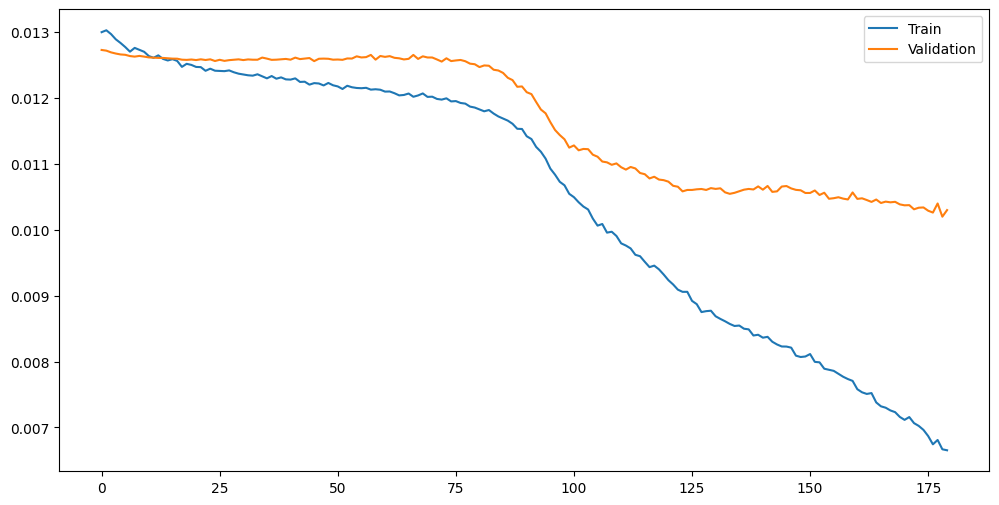

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(history.history["loss"][20:], label="Train")
plt.plot(history.history["val_loss"][20:], label="Validation")
plt.legend()
plt.show()

<b>Вывод</b>

Однозначно стоит использовать RNN, а не CatBoost/RandomForestClassifier. У этой модели больше всех accuracy и f1-score.

# Модуль Б

Будем дальше пытаться улучшить показатели модели RNN с применением слоёв LSTM.

Почему эта модель? - данная модель способна работать с временными рядами, то есть не обрабатывать слова по отдельности, а рассматривать их как единую последовательность. Также можно всячески видоизменять модель, добавлять/удалять/модифицировать слои, а также очень подробно следить за процессом обучения.

## Добавление новых признаков

In [22]:
# Разбиваем Исх. Дату на год, месяц и день
years = dataset["Исх. Дата"].dt.year
months = dataset["Исх. Дата"].dt.month
days = dataset["Исх. Дата"].dt.day

dataset.insert(loc=0, column="Исх. Год", value=years)
dataset.insert(loc=1, column="Исх. Месяц", value=months)
dataset.insert(loc=2, column="Исх. День", value=days)

In [88]:
dataset[["Исх. Год", "Исх. Месяц", "Исх. День"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Исх. Год    4955 non-null   float64
 1   Исх. Месяц  4955 non-null   float64
 2   Исх. День   4955 non-null   float64
dtypes: float64(3)
memory usage: 116.5 KB


In [23]:
# Замена пропусков на моды
dataset["Исх. Год"] = dataset["Исх. Год"].fillna(dataset["Исх. Год"].mode()[0])
dataset["Исх. Месяц"] = dataset["Исх. Месяц"].fillna(dataset["Исх. Месяц"].mode()[0])
dataset["Исх. День"] = dataset["Исх. День"].fillna(dataset["Исх. День"].mode()[0])

## Обучение новой модели

### Формирование X и Y

In [42]:
descriptions = dataset["Краткое содержание"]
authors = dataset["Автор"]
notes = dataset["Примечание"]
dates = dataset[["Исх. Год", "Исх. Месяц", "Исх. День"]]
y = dataset.iloc[:, 8:]

In [43]:
indices = np.arange(len(descriptions))

np.random.seed(42)
np.random.shuffle(indices)

descriptions = descriptions[indices]
authors = authors[indices]
notes = notes[indices]
dates = dates.iloc[indices]
y = y.iloc[indices]

In [44]:
vectorizer_1 = TfidfVectorizer(max_features=MAX_VOCAB_SIZE_1)
text_bow = vectorizer_1.fit_transform(descriptions).toarray()

vectorizer_2 = TfidfVectorizer(max_features=MAX_VOCAB_SIZE_2)
author_bow = vectorizer_2.fit_transform(authors).toarray()

vectorizer_3 = TfidfVectorizer(max_features=MAX_VOCAB_SIZE_3)
note_bow = vectorizer_3.fit_transform(notes).toarray()

bow = np.concatenate([text_bow, author_bow, note_bow], axis=1)

bow = bow.astype('float32')

print(bow.shape)

bow = np.expand_dims(bow, axis=1)
text_bow = np.expand_dims(text_bow, axis=1)
author_bow = np.expand_dims(author_bow, axis=1)
note_bow = np.expand_dims(note_bow, axis=1)
dates = np.expand_dims(dates, axis=1)
y = np.array(y)
y = np.expand_dims(y, axis=1)

(4967, 1000)


In [28]:
train_size = int(len(indices) * 0.8)

train_bow = bow[:train_size]
test_bow = bow[train_size:]

train_text_bow = text_bow[:train_size]
test_text_bow = text_bow[train_size:]

train_author_bow = author_bow[:train_size]
test_author_bow = author_bow[train_size:]

train_note_bow = note_bow[:train_size]
test_note_bow = note_bow[train_size:]

train_dates = dates[:train_size]
test_dates = dates[train_size:]

train_y = y[:train_size]
test_y = y[train_size:]

### Построение и обучение модели

#### Лучшая версия

In [29]:
# Блок с обработкой краткого описания
input_1 = Input(shape=(text_bow.shape[1], text_bow.shape[2]))
x_1 = LSTM(LSTM_UNITS, return_sequences=True)(input_1)
x_1 = Dropout(DROPOUT_RATE)(x_1)
x_1 = LSTM(LSTM_UNITS, return_sequences=True)(x_1)
x_1 = Dropout(DROPOUT_RATE)(x_1)

# Блок с обработкой автора
input_2 = Input(shape=(author_bow.shape[1], author_bow.shape[2]))
x_2 = LSTM(64, return_sequences=True)(input_2)
x_2 = Dropout(DROPOUT_RATE)(x_2)
x_2 = LSTM(32, return_sequences=True)(x_2)
x_2 = Dropout(DROPOUT_RATE)(x_2)

# Блок с обработкой примечаний
input_3 = Input(shape=(note_bow.shape[1], note_bow.shape[2]))
x_3 = LSTM(LSTM_UNITS, return_sequences=True)(input_3)
x_3 = Dropout(DROPOUT_RATE)(x_3)
x_3 = LSTM(LSTM_UNITS, return_sequences=True)(x_3)
x_3 = Dropout(DROPOUT_RATE)(x_3)

# Блок с обработкой даты
input_4 = Input(shape=(dates.shape[1], dates.shape[2]))
x_4 = Dense(32, activation="relu")(input_4)
x = Concatenate(axis=2)([x_1, x_2, x_3, x_4])
x = Dense(256, activation="relu")(x)
output = Dense(y.shape[2], activation='sigmoid')(x)

model = Model(inputs=[input_1, input_2, input_3, input_4], outputs=output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1, 500)]     0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1, 200)]     0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 1, 300)]     0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 1, 128)       322048      ['input_1[0][0]']                
                                                                                              

In [79]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        verbose=1,
        restore_best_weights=True),
]

# Компиляция модели
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-3), metrics=['accuracy', f1_m, precision_m, recall_m])

# Обучение модели
history = model.fit([train_text_bow, train_author_bow, train_note_bow, train_dates], train_y, 
epochs=200, batch_size=256, validation_data=([test_text_bow, test_author_bow, test_note_bow, test_dates], test_y), callbacks=callbacks)

# Оценка модели
results = model.evaluate([test_text_bow, test_author_bow, test_note_bow, test_dates], test_y)
print(f"Loss: {results[0]:.4f}")
print(f"Accuracy: {results[1]:.4f}")
print(f"F1-score: {results[2]:.4f}")

Epoch 1/200
16/16 [==============================] - 8s 114ms/step - loss: 7.1225 - accuracy: 0.0619 - f1_m: 0.0534 - precision_m: 0.0440 - recall_m: 0.2264 - val_loss: 0.0850 - val_accuracy: 0.3219 - val_f1_m: 0.3141 - val_precision_m: 0.3242 - val_recall_m: 0.3049
Epoch 2/200
16/16 [==============================] - 0s 14ms/step - loss: 0.1039 - accuracy: 0.2560 - f1_m: 0.2013 - precision_m: 0.2224 - recall_m: 0.2019 - val_loss: 0.0824 - val_accuracy: 0.3219 - val_f1_m: 0.4060 - val_precision_m: 0.3171 - val_recall_m: 0.5650
Epoch 3/200
16/16 [==============================] - 0s 14ms/step - loss: 0.0992 - accuracy: 0.2520 - f1_m: 0.1590 - precision_m: 0.2660 - recall_m: 0.1423 - val_loss: 0.0724 - val_accuracy: 0.3139 - val_f1_m: 0.2877 - val_precision_m: 0.3161 - val_recall_m: 0.2642
Epoch 4/200
16/16 [==============================] - 0s 13ms/step - loss: 0.0883 - accuracy: 0.2917 - f1_m: 0.1190 - precision_m: 0.2567 - recall_m: 0.0982 - val_loss: 0.0616 - val_accuracy: 0.3099 - v

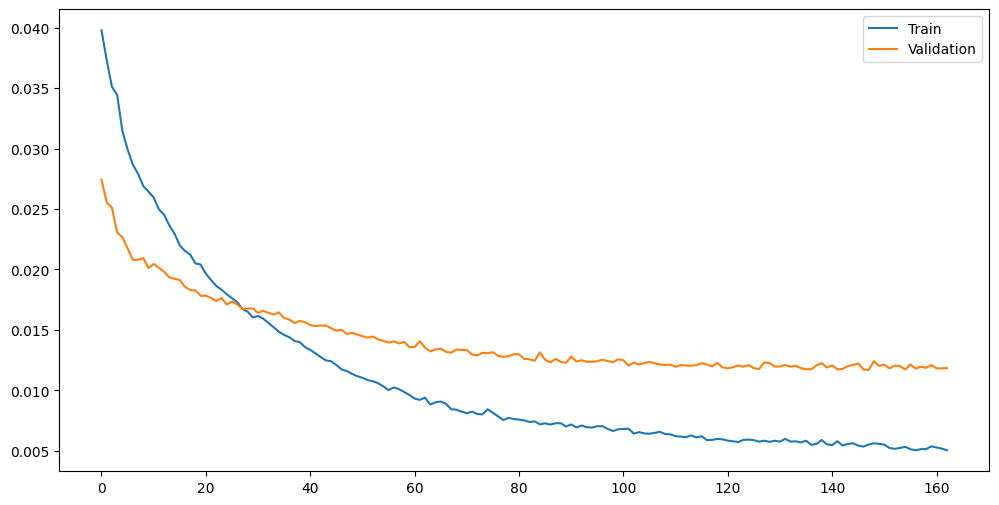

In [80]:
plt.figure(figsize=(12, 6))
plt.plot(history.history["loss"][10:], label="Train")
plt.plot(history.history["val_loss"][10:], label="Validation")
plt.legend()
plt.show()

<b>Вывод</b>

Результаты улучшились, по сравненю с  прошлой моделью. Попробуем улучшить ещё.

## Удаление чисел из текстов

In [81]:
def remove_numbers(text):
    number_pattern = r'\d+'
    without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
    return without_number

In [83]:
remove_numbers("Ходить школа 123")

'Ходить школа  '

In [85]:
dataset["Краткое содержание"] = dataset["Краткое содержание"].progress_apply(remove_numbers)
dataset["Автор"] = dataset["Автор"].progress_apply(remove_numbers)
dataset["Примечание"] = dataset["Примечание"].progress_apply(remove_numbers)

100%|██████████| 4967/4967 [00:00<00:00, 1093716.29it/s]


In [86]:
descriptions = dataset["Краткое содержание"]
authors = dataset["Автор"]
notes = dataset["Примечание"]
dates = dataset[["Исх. Год", "Исх. Месяц", "Исх. День"]]
y = dataset.iloc[:, 8:]

indices = np.arange(len(descriptions))

np.random.seed(42)
np.random.shuffle(indices)

descriptions = descriptions[indices]
authors = authors[indices]
notes = notes[indices]
dates = dates.iloc[indices]
y = y.iloc[indices]

In [87]:
vectorizer = TfidfVectorizer(max_features=MAX_VOCAB_SIZE_1)
text_bow = vectorizer.fit_transform(descriptions).toarray()

vectorizer = TfidfVectorizer(max_features=MAX_VOCAB_SIZE_2)
author_bow = vectorizer.fit_transform(authors).toarray()

vectorizer = TfidfVectorizer(max_features=MAX_VOCAB_SIZE_3)
note_bow = vectorizer.fit_transform(notes).toarray()

bow = np.concatenate([text_bow, author_bow, note_bow], axis=1)

bow = bow.astype('float32')

print(bow.shape)

bow = np.expand_dims(bow, axis=1)
text_bow = np.expand_dims(text_bow, axis=1)
author_bow = np.expand_dims(author_bow, axis=1)
note_bow = np.expand_dims(note_bow, axis=1)
dates = np.expand_dims(dates, axis=1)
y = np.array(y)
y = np.expand_dims(y, axis=1)

(4967, 1000)


In [88]:
train_size = int(len(indices) * 0.8)

train_bow = bow[:train_size]
test_bow = bow[train_size:]

train_text_bow = text_bow[:train_size]
test_text_bow = text_bow[train_size:]

train_author_bow = author_bow[:train_size]
test_author_bow = author_bow[train_size:]

train_note_bow = note_bow[:train_size]
test_note_bow = note_bow[train_size:]

train_dates = dates[:train_size]
test_dates = dates[train_size:]

train_y = y[:train_size]
test_y = y[train_size:]

In [90]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        verbose=1,
        restore_best_weights=True),
]

# Компиляция модели
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-3), metrics=['accuracy', f1_m, precision_m, recall_m])

# Обучение модели
history = model.fit([train_text_bow, train_author_bow, train_note_bow, train_dates], train_y, 
epochs=200, batch_size=256, validation_data=([test_text_bow, test_author_bow, test_note_bow, test_dates], test_y), callbacks=callbacks)

# Оценка модели
results = model.evaluate([test_text_bow, test_author_bow, test_note_bow, test_dates], test_y)
print(f"Loss: {results[0]:.4f}")
print(f"Accuracy: {results[1]:.4f}")
print(f"F1-score: {results[2]:.4f}")

Epoch 1/200
16/16 [==============================] - 8s 139ms/step - loss: 7.6088 - accuracy: 0.0000e+00 - f1_m: 0.0176 - precision_m: 0.0092 - recall_m: 0.3700 - val_loss: 0.0921 - val_accuracy: 0.0241 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/200
16/16 [==============================] - 0s 17ms/step - loss: 0.0888 - accuracy: 0.2371 - f1_m: 0.1575 - precision_m: 0.1757 - recall_m: 0.1682 - val_loss: 0.0658 - val_accuracy: 0.3139 - val_f1_m: 0.0493 - val_precision_m: 0.3404 - val_recall_m: 0.0266
Epoch 3/200
16/16 [==============================] - 0s 16ms/step - loss: 0.0717 - accuracy: 0.2842 - f1_m: 0.1234 - precision_m: 0.2127 - recall_m: 0.1154 - val_loss: 0.0502 - val_accuracy: 0.3068 - val_f1_m: 0.3201 - val_precision_m: 0.3110 - val_recall_m: 0.3302
Epoch 4/200
16/16 [==============================] - 0s 14ms/step - loss: 0.0555 - accuracy: 0.2887 - f1_m: 0.1151 - precision_m: 0.2362 - recall_m: 0.1037 - val_loss: 0.0367 - val_accu

<b>Вывод</b>

Не привело к улучшению метрик модели.

## Генерация новых данных

In [63]:
class_counts = dataset.iloc[:, 8:].sum()
total_count = np.sum(class_counts)
relative_frequencies = class_counts / total_count
inverted_frequencies = 1 - relative_frequencies
sum_of_inversions = np.sum(inverted_frequencies)  # Суммируем "инвертированные" частоты
class_weights = inverted_frequencies / sum_of_inversions ## Веса (вероятности) для каждого класса (адресата)

In [64]:
def generate_text_ngrams(label, num_words=20, dataset=dataset, tfidf_df=text_bow, vectorizer_obj=vectorizer_1):
    """Генерирует текст, используя n-граммы."""
    indexes = dataset[dataset[label] == 1].index
    class_data = tfidf_df[indexes]
    

    word_probabilities = class_data.sum(axis=0)

    # 4. Нормализуем вероятности, чтобы они суммировались в 1.
    word_probabilities = word_probabilities / word_probabilities.sum()

    word_probabilities = word_probabilities.reshape(-1)

    # 5. Получаем список слов (или n-грамм) из vectorizer_obj.
    feature_names = vectorizer_obj.get_feature_names_out()

    # 6. Сэмплируем слова (или n-граммы) на основе их вероятностей.
    words = np.random.choice(feature_names, size=num_words, replace=True, p=word_probabilities)
    words = list(set(words))

    # 7. Объединяем выбранные слова в текст.
    return " ".join(words)

In [65]:
def get_random_values(label):
    indices = dataset[dataset[label] == 1].index

    random_indices = np.random.choice(indices, size=3)
    date = dataset[["Исх. Год", "Исх. Месяц", "Исх. День"]].iloc[random_indices[0]]
    note = dataset["Примечание"].iloc[random_indices[1]]
    author = dataset["Автор"].iloc[random_indices[2]]

    return date.tolist(), note, author

In [66]:
descriptions = dataset["Краткое содержание"]
authors = dataset["Автор"]
notes = dataset["Примечание"]
dates = dataset[["Исх. Год", "Исх. Месяц", "Исх. День"]]
y = dataset.iloc[:, 8:]

In [67]:
indices = np.arange(len(descriptions))

np.random.seed(42)
np.random.shuffle(indices)

descriptions = descriptions[indices]
authors = authors[indices]
notes = notes[indices]
dates = dates.iloc[indices]
y = y.iloc[indices]

In [68]:
np.mean(dataset["Краткое содержание"].str.split(" ").apply(len)) # Среднее число слов в столбце Краткое содержание

10.207972619287297

Для генерируемых данных будем брать значение в 20 с учётом удаления повторов.

In [69]:
gen_labels = []
gen_dates = []
gen_authors = []
gen_notes = []
gen_texts = []

for i in tqdm(range(500)):
    column = np.random.choice(class_weights.index, p=class_weights.values)
    
    label = np.zeros(len(y.columns))
    label[y.columns.tolist().index(column)] = 1

    date, note, author = get_random_values(column)

    text = generate_text_ngrams(column)

    gen_labels.append(label)
    gen_dates.append(date)
    gen_authors.append(author)
    gen_notes.append(note)
    gen_texts.append(text)

100%|██████████| 500/500 [00:13<00:00, 38.17it/s]


In [70]:
train_size = int(len(indices) * 0.8)

train_texts = descriptions[:train_size]
test_texts = descriptions[train_size:]

train_authors = authors[:train_size]
test_authors = authors[train_size:]

train_notes = notes[:train_size]
test_notes = notes[train_size:]

train_dates = dates[:train_size]
test_dates = dates[train_size:]

train_y = y[:train_size]
test_y = y[train_size:]

In [71]:
train_texts = pd.concat([train_texts, pd.Series(gen_texts)])
train_authors = pd.concat([train_authors, pd.Series(gen_authors)])
train_dates = pd.concat([train_dates, pd.DataFrame(gen_dates, columns=train_dates.columns)])
train_notes = pd.concat([train_notes, pd.Series(gen_notes)])
train_y = pd.concat([train_y, pd.DataFrame(gen_labels, columns=train_y.columns)])

In [72]:
indices = np.arange(len(train_texts))

np.random.seed(42)
np.random.shuffle(indices)

train_texts = train_texts.iloc[indices]
train_authors = train_authors.iloc[indices]
train_notes = train_notes.iloc[indices]
train_dates = train_dates.iloc[indices]
train_y = train_y.iloc[indices]

In [73]:
train_text_bow = vectorizer_1.transform(train_texts).toarray()
test_text_bow = vectorizer_1.transform(test_texts).toarray()

train_author_bow = vectorizer_2.transform(train_authors).toarray()
test_author_bow = vectorizer_2.transform(test_authors).toarray()

train_note_bow = vectorizer_3.transform(train_notes).toarray()
test_note_bow = vectorizer_3.transform(test_notes).toarray()

In [74]:
train_y = np.expand_dims(np.array(train_y), axis=1)
test_y = np.expand_dims(np.array(test_y), axis=1)

train_dates = np.expand_dims(train_dates, axis=1)
test_dates = np.expand_dims(test_dates, axis=1)

train_text_bow = np.expand_dims(train_text_bow, axis=1)
test_text_bow = np.expand_dims(test_text_bow, axis=1)

train_author_bow = np.expand_dims(train_author_bow, axis=1)
test_author_bow = np.expand_dims(test_author_bow, axis=1)

train_note_bow = np.expand_dims(train_note_bow, axis=1)
test_note_bow = np.expand_dims(test_note_bow, axis=1)

In [75]:
# Блок с обработкой краткого описания
input_1 = Input(shape=(train_text_bow.shape[1], train_text_bow.shape[2]))
x_1 = LSTM(LSTM_UNITS, return_sequences=True)(input_1)
x_1 = Dropout(DROPOUT_RATE)(x_1)
x_1 = LSTM(LSTM_UNITS, return_sequences=True)(x_1)
x_1 = Dropout(DROPOUT_RATE)(x_1)

# Блок с обработкой автора
input_2 = Input(shape=(train_author_bow.shape[1], train_author_bow.shape[2]))
x_2 = LSTM(64, return_sequences=True)(input_2)
x_2 = Dropout(DROPOUT_RATE)(x_2)
x_2 = LSTM(32, return_sequences=True)(x_2)
x_2 = Dropout(DROPOUT_RATE)(x_2)

# Блок с обработкой примечаний
input_3 = Input(shape=(train_note_bow.shape[1], train_note_bow.shape[2]))
x_3 = LSTM(LSTM_UNITS, return_sequences=True)(input_3)
x_3 = Dropout(DROPOUT_RATE)(x_3)
x_3 = LSTM(LSTM_UNITS, return_sequences=True)(x_3)
x_3 = Dropout(DROPOUT_RATE)(x_3)

# Блок с обработкой даты
input_4 = Input(shape=(train_dates.shape[1], train_dates.shape[2]))
x_4 = Dense(32, activation="relu")(input_4)
x = Concatenate(axis=2)([x_1, x_2, x_3, x_4])
x = Dense(256, activation="relu")(x)
output = Dense(train_y.shape[2], activation='sigmoid')(x)

model = Model(inputs=[input_1, input_2, input_3, input_4], outputs=output)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 1, 500)]     0           []                               
                                                                                                  
 input_10 (InputLayer)          [(None, 1, 200)]     0           []                               
                                                                                                  
 input_11 (InputLayer)          [(None, 1, 300)]     0           []                               
                                                                                                  
 lstm_12 (LSTM)                 (None, 1, 128)       322048      ['input_9[0][0]']                
                                                                                            

In [76]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        verbose=1,
        restore_best_weights=True),
]

# Компиляция модели
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-3), metrics=['accuracy', f1_m, precision_m, recall_m])

# Обучение модели
history = model.fit([train_text_bow, train_author_bow, train_note_bow, train_dates], train_y, 
epochs=200, batch_size=256, validation_data=([test_text_bow, test_author_bow, test_note_bow, test_dates], test_y), callbacks=callbacks)

# Оценка модели
results = model.evaluate([test_text_bow, test_author_bow, test_note_bow, test_dates], test_y)
print(f"Loss: {results[0]:.4f}")
print(f"Accuracy: {results[1]:.4f}")
print(f"F1-score: {results[2]:.4f}")

Epoch 1/200
18/18 [==============================] - 7s 101ms/step - loss: 7.8827 - accuracy: 0.0025 - f1_m: 0.0293 - precision_m: 0.0187 - recall_m: 0.2916 - val_loss: 0.1015 - val_accuracy: 0.0080 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/200
18/18 [==============================] - 0s 13ms/step - loss: 0.1253 - accuracy: 0.1735 - f1_m: 0.1116 - precision_m: 0.1100 - recall_m: 0.1238 - val_loss: 0.0950 - val_accuracy: 0.1278 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/200
18/18 [==============================] - 0s 12ms/step - loss: 0.1183 - accuracy: 0.2587 - f1_m: 0.0811 - precision_m: 0.0866 - recall_m: 0.0766 - val_loss: 0.0803 - val_accuracy: 0.3219 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 4/200
18/18 [==============================] - 0s 12ms/step - loss: 0.0996 - accuracy: 0.2701 - f1_m: 0.0975 - precision_m: 0.1148 - recall_m: 0.0899 - val_los

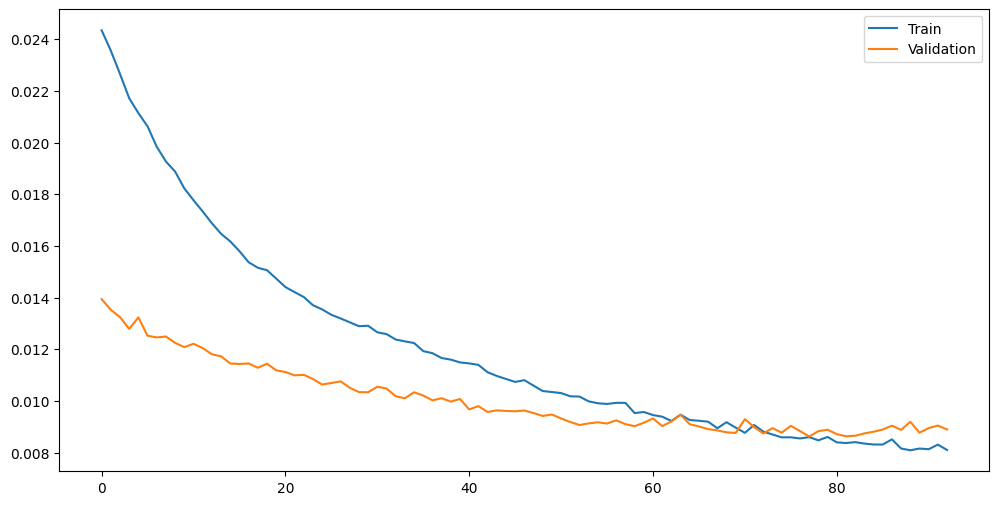

In [77]:
plt.figure(figsize=(12, 6))
plt.plot(history.history["loss"][20:], label="Train")
plt.plot(history.history["val_loss"][20:], label="Validation")
plt.legend()
plt.show()

<b>Вывод</b>

Суть подхода: случайная генерация новых текстов, учитывающая частоту встречаемости классов (редкие классы чаще генерируются) и частоту определённых токенов для конкретного класса (чаще встречается => чаще появляется при генерации), но не учитывающая последовательность (то есть слова идут в случайном порядке). Всего создано 500 новых записей.

Результат: метрики модели не улучшились.

Причины: Отсутствие последовательного осмысленного генерирования текста, наличие очень маленьких классов (1-2 объекта), из-за чего генерируемые данные повторяли оригинал и модель немного переобучалась.